In [1]:
no <- 1:4
name <- c("Apple","Banana","Peach","Berry")
price <- c(500,200,200,50)
qty <- c(5,4,3,2)

In [2]:
#벡터를 이용하여 데이터 프레임 만들기
fruit <- data.frame(번호=no, 제품명=name, 금액=price, 재고량=qty)
fruit

번호,제품명,금액,재고량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [3]:
# 현재 메모리에 있는 변수 보기
ls()

[1] "fruit" "name"  "no"    "price" "qty"

In [4]:
# 메모리 형태로 파일 보관

save(no, fruit, name, file = "../R_yang/testFruit.txt")

In [5]:
rm(no, fruit, name)

In [6]:
ls()

[1] "price" "qty"

In [5]:
load("../R_yang/testFruit.txt")

In [6]:
fruit

번호,제품명,금액,재고량
1,Apple,500,5
2,Banana,200,4
3,Peach,200,3
4,Berry,50,2


In [1]:
# fruit를 csv로 저장하기

write.csv(fruit,"../R_yang/Fruit.csv")

ERROR: Error in is.data.frame(x): 객체 'fruit'를 찾을 수 없습니다


In [2]:
fruit<-read.csv("../R_yang/Fruit.csv")

In [3]:
write.csv(fruit,"../R_yang/Fruit2.csv, row.names=F")

In [4]:
read.csv("../R_yang/Fruit2.csv")

X,번호,제품명,금액,재고량
1,1,Apple,500,5
2,2,Banana,200,4
3,3,Peach,200,3
4,4,Berry,50,2


In [13]:
write.csv(fruit,"../R_yang/Fruit.csv", row.names=F)

# 세계 GDP 순위 데이터 정제 및 차트 만들기

In [14]:
# Data Set 불러오기
GDP_ranking <- read.csv("../R_yang/GDP.csv")

In [15]:
GDP_ranking2 <- GDP_ranking[-c(1:4),c(1,2,4,5)]
head(GDP_ranking2)


,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"


In [16]:
# 상위 15개국만 선별한다.

GDP_ranking15 <- GDP_ranking2[c(1:15),]
GDP_ranking15

,X,Gross.domestic.product.2018,X.2,X.3
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [17]:
# 컬럼 이름 정의 : Code, Ranking, Nation, GDP
colnames(GDP_ranking15) <- c("Code", "Ranking", "Nation", "GDP")
GDP_ranking15

,Code,Ranking,Nation,GDP
5,USA,1,United States,"20,494,100"
6,CHN,2,China,"13,608,152"
7,JPN,3,Japan,"4,970,916"
8,DEU,4,Germany,"3,996,759"
9,GBR,5,United Kingdom,"2,825,208"
10,FRA,6,France,"2,777,535"
11,IND,7,India,"2,726,323"
12,ITA,8,Italy,"2,073,902"
13,BRA,9,Brazil,"1,868,626"
14,CAN,10,Canada,"1,712,510"


In [18]:
# rownames 새로 구성하기

rownames(GDP_ranking15) <- c()
print(GDP_ranking15)

   Code Ranking             Nation          GDP
1   USA       1      United States  20,494,100 
2   CHN       2              China  13,608,152 
3   JPN       3              Japan   4,970,916 
4   DEU       4            Germany   3,996,759 
5   GBR       5     United Kingdom   2,825,208 
6   FRA       6             France   2,777,535 
7   IND       7              India   2,726,323 
8   ITA       8              Italy   2,073,902 
9   BRA       9             Brazil   1,868,626 
10  CAN      10             Canada   1,712,510 
11  RUS      11 Russian Federation   1,657,554 
12  KOR      12        Korea, Rep.   1,619,424 
13  AUS      13          Australia   1,432,195 
14  ESP      14              Spain   1,426,189 
15  MEX      15             Mexico   1,223,809 


In [19]:
# 구조 확인하기

str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 230 levels "","ABW","AFG",..: 216 38 103 52 72 68 94 100 28 34 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [20]:
# Factor의 갯수가 15개가 정상일텐데 이상하다 -> 재구성
GDP_ranking15$Code <- factor(GDP_ranking15$Code)
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 212 levels "",".. Not available.  ",..: 3 114 131 142 153 164 175 186 197 4 ...
 $ Nation : Factor w/ 231 levels "","Afghanistan",..: 219 43 104 78 218 73 95 102 28 37 ...
 $ GDP    : Factor w/ 220 levels ""," .. "," 1,022 ",..: 78 44 137 113 77 75 74 67 20 19 ...


In [21]:
ncol(GDP_ranking15)

[1] 4

In [22]:
for(i in 1:ncol(GDP_ranking15)){
    GDP_ranking15[,i] <- factor(GDP_ranking15[,i])
}

In [23]:
str(GDP_ranking15)

'data.frame':	15 obs. of  4 variables:
 $ Code   : Factor w/ 15 levels "AUS","BRA","CAN",..: 15 4 11 5 8 7 9 10 2 3 ...
 $ Ranking: Factor w/ 15 levels "1","10","11",..: 1 8 9 10 11 12 13 14 15 2 ...
 $ Nation : Factor w/ 15 levels "Australia","Brazil",..: 15 4 9 6 14 5 7 8 2 3 ...
 $ GDP    : Factor w/ 15 levels " 1,223,809 ",..: 13 8 15 14 12 11 10 9 7 6 ...


In [24]:
GDP_ranking15

Code,Ranking,Nation,GDP
USA,1,United States,"20,494,100"
CHN,2,China,"13,608,152"
JPN,3,Japan,"4,970,916"
DEU,4,Germany,"3,996,759"
GBR,5,United Kingdom,"2,825,208"
FRA,6,France,"2,777,535"
IND,7,India,"2,726,323"
ITA,8,Italy,"2,073,902"
BRA,9,Brazil,"1,868,626"
CAN,10,Canada,"1,712,510"


In [25]:
library(stringr)


Attaching package: ‘stringr’

The following object is masked _by_ ‘.GlobalEnv’:

    fruit



In [26]:
GDP_ranking15$GDP <- as.integer(str_replace_all(GDP_ranking15$GDP,",",""))

In [27]:
class(GDP_ranking15[,4])

[1] "integer"

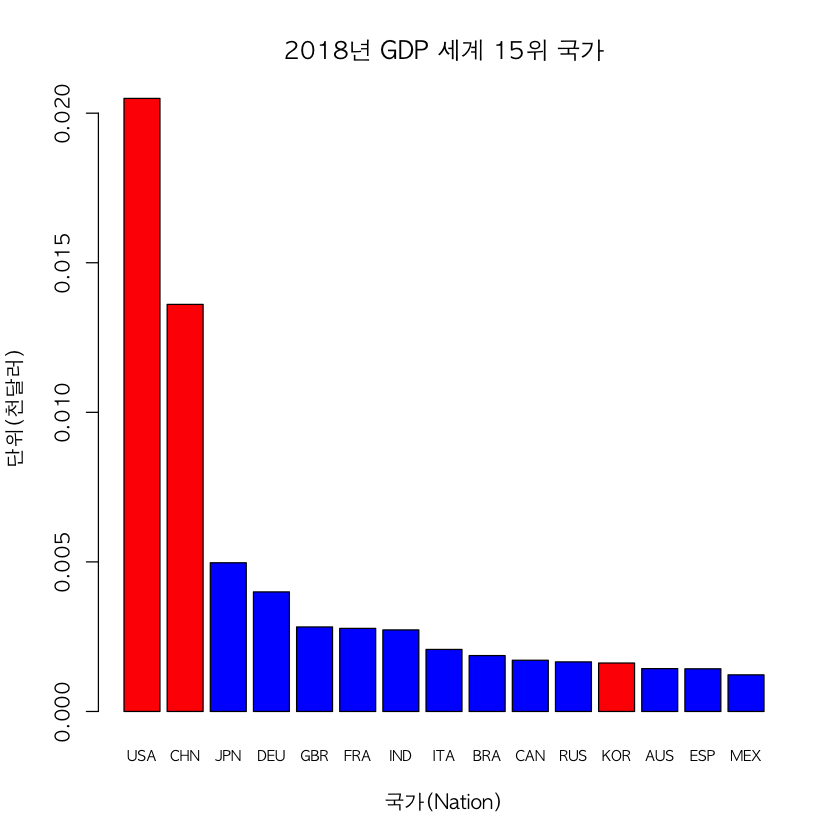

In [146]:
options(scipen = 100)
options(warn = -1)
par(family = "AppleGothic")
barplot(GDP_ranking15$GDP, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        col = c(rep('red',2),rep('blue',9),'red',rep('blue',3))
        
       )

In [145]:
GDP_ranking15$GDP <- GDP_ranking15$GDP/1000
GDP_ranking15

Code,Ranking,Nation,GDP
USA,1,United States,0.020494100
CHN,2,China,0.013608152
JPN,3,Japan,0.004970916
DEU,4,Germany,0.003996759
GBR,5,United Kingdom,0.002825208
FRA,6,France,0.002777535
IND,7,India,0.002726323
ITA,8,Italy,0.002073902
BRA,9,Brazil,0.001868626
CAN,10,Canada,0.001712510


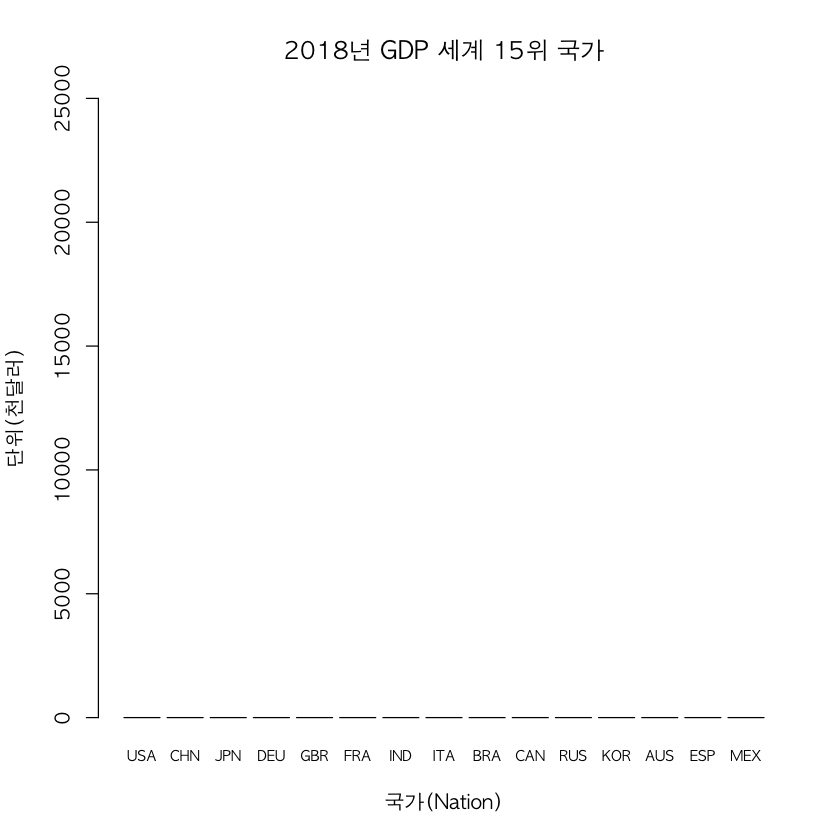

In [147]:
options(scipen = 100)
options(warn = -1)
par(family = "AppleGothic")
barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        col = c(rep('red',2),rep('blue',9),'red',rep('blue',3)),
        ylim = c(0, 25000)
     
       )

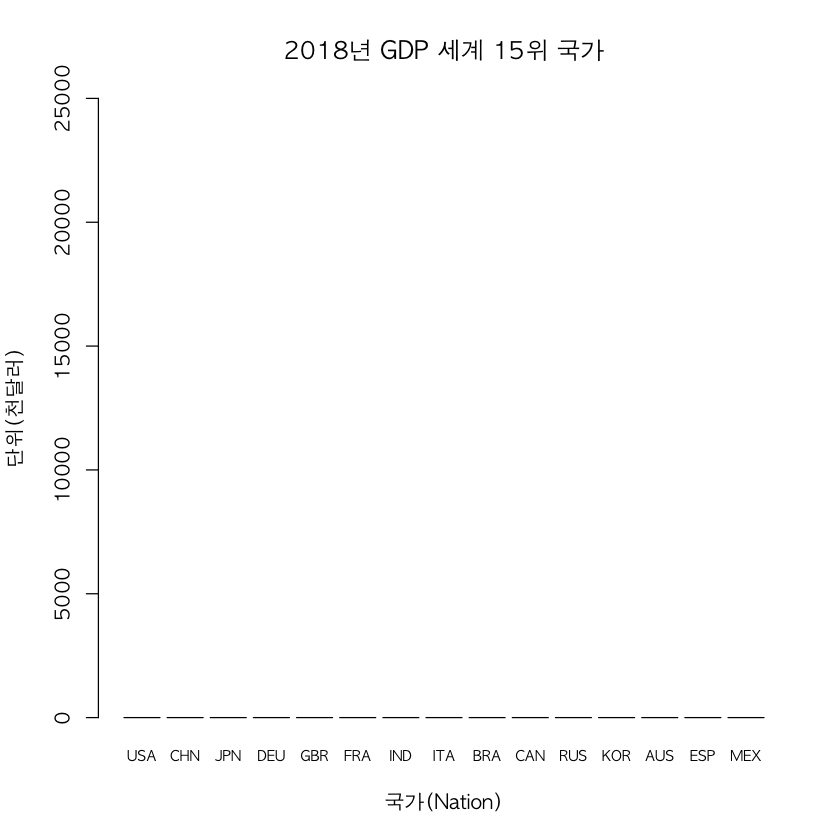

In [148]:
#GDP가 3000 이상인 국가만 빨간색으로 표시하기
options(scipen = 100)
options(warn = -1)
par(family = "AppleGothic")
barplot(GDP_ranking15$GDP/1000, # GDP상위 15개국 Data
        main = "2018년 GDP 세계 15위 국가",
        xlab = "국가(Nation)",
        ylab = "단위(천달러)",
        names = GDP_ranking15$Code,
        cex.names = 0.7,
        col = ifelse(GDP_ranking15$GDP/1000>=3000,"red","blue"),
        ylim = c(0, 25000)
     
       )

---
# 데이터 처리

In [149]:
#정렬 데이터
library(dplyr)

In [150]:
# Sepal.Length 기준으로 오름차순 정렬

head(arrange(iris, Sepal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,2.9,1.4,0.2,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.1,1.5,0.2,setosa


In [151]:
# Sepal.Length 기준으로 오름차순 정렬 후 동일한 크기가 잇으면 Petal.Length기준 오름차순 정렬
head(arrange(iris, Sepal.Length, Petal.Length))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
4.3,3.0,1.1,0.1,setosa
4.4,3.0,1.3,0.2,setosa
4.4,3.2,1.3,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.5,2.3,1.3,0.3,setosa
4.6,3.6,1.0,0.2,setosa


In [152]:
# Sepal.Length 기준으로 내림차순 정렬 후
head(arrange(iris, desc(Sepal.Length)))

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
7.9,3.8,6.4,2.0,virginica
7.7,3.8,6.7,2.2,virginica
7.7,2.6,6.9,2.3,virginica
7.7,2.8,6.7,2.0,virginica
7.7,3.0,6.1,2.3,virginica
7.6,3.0,6.6,2.1,virginica


In [153]:
# Sepal.Length 기준으로 내림차순 정렬후 Sepal.Length와 Sepal.Width만 보기
arrange(iris[,1:2], desc(Sepal.Length))

Sepal.Length,Sepal.Width
7.9,3.8
7.7,3.8
7.7,2.6
7.7,2.8
7.7,3.0
7.6,3.0
7.4,2.8
7.3,2.9
7.2,3.6
7.2,3.2


---
# 샘플링

In [154]:
# 랜덤 샘플링(중복값을 허용하지 않음)
sample(1:45, 6)

[1] 29 15 11  1 17 45

In [155]:
nrow(iris)
ncol(iris)

[1] 150

[1] 5

In [39]:
samp <- sample(1:nrow(iris),nrow(iris)*0.7)
samp

[1] 107  99 136 121 119  29 101  75  58 108 126  66 120  25  35 114   7 128
 [19]  14  56 149  72 111  81  47  27   3 139 129  16 135  23 138  24  96   1
 [37]  11  43   4  83  13  12  63 137  19  44  68  28 116  71  70  87  65 144
 [55] 124  32  89 118  18  20  92  45 109   6   5 110 127  94  76  88 147  15
 [73] 133 100  97   2  48  46 106 104 142  52  69 130  26  22  73 146  74 141
 [91] 131 145  64  85 140 123  91  54  78  41  36  77  80   8  62

In [40]:
irisSamp <- iris[samp,]
head(irisSamp)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
107,4.9,2.5,4.5,1.7,virginica
99,5.1,2.5,3.0,1.1,versicolor
136,7.7,3.0,6.1,2.3,virginica
121,6.9,3.2,5.7,2.3,virginica
119,7.7,2.6,6.9,2.3,virginica
29,5.2,3.4,1.4,0.2,setosa


In [41]:
summary(irisSamp)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.200   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.869   Mean   :3.059   Mean   :3.777   Mean   :1.211  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :35  
 versicolor:34  
 virginica :36  
                
                
                

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [42]:
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         34         36 

In [43]:
# iris Sampling시 Species별로 Sampling

samp <- c(sample(1:50, 35),sample(51:100, 35),sample(101:150, 35))

In [44]:
irisSamp <- iris[samp,]
table(irisSamp$Species)


    setosa versicolor  virginica 
        35         35         35 

In [45]:
#TrainingData와 Test Data분리하기

iris.train <- iris[samp,]
iris.test <- iris[-samp,]

In [46]:
summary(iris.train)
summary(iris.test)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.20   Min.   :1.000   Min.   :0.100   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.600   1st Qu.:0.300   versicolor:35  
 Median :5.800   Median :3.00   Median :4.300   Median :1.300   virginica :35  
 Mean   :5.846   Mean   :3.07   Mean   :3.758   Mean   :1.213                  
 3rd Qu.:6.500   3rd Qu.:3.30   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.600   Min.   :2.000   Min.   :1.300   Min.   :0.200  
 1st Qu.:5.200   1st Qu.:2.700   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.500   Median :1.300  
 Mean   :5.838   Mean   :3.029   Mean   :3.758   Mean   :1.167  
 3rd Qu.:6.400   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :3.900   Max.   :6.100   Max.   :2.500  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

In [47]:
iris$Species=='setosa'

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

---
## 부분집합

In [48]:
# iris에서 Species가 setosa인것만 추출하여 iris_setosa라는 데이터프레임 만들기
iris_setosa <- subset(iris, Species == "setosa")


str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [49]:
iris_setosa

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


In [50]:
iris_setosa$Species <- factor(iris_setosa$Species)
str(iris_setosa)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 1 level "setosa": 1 1 1 1 1 1 1 1 1 1 ...


In [51]:
# iris에서 Species가 versicolor인것만 추출하여 iris_versicolor라는 데이터 프레임 만들기

In [52]:
iris_versicolor <- subset(iris, Species == "versicolor")
iris_versicolor

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
51,7.0,3.2,4.7,1.4,versicolor
52,6.4,3.2,4.5,1.5,versicolor
53,6.9,3.1,4.9,1.5,versicolor
54,5.5,2.3,4.0,1.3,versicolor
55,6.5,2.8,4.6,1.5,versicolor
56,5.7,2.8,4.5,1.3,versicolor
57,6.3,3.3,4.7,1.6,versicolor
58,4.9,2.4,3.3,1.0,versicolor
59,6.6,2.9,4.6,1.3,versicolor
60,5.2,2.7,3.9,1.4,versicolor


In [53]:
str(iris_versicolor)

'data.frame':	50 obs. of  5 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Sepal.Width : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ Petal.Length: num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ Petal.Width : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 2 2 2 2 2 2 2 2 2 2 ...


In [54]:
iris_versicolor$Species <- factor(iris_versicolor$Species)
rownames(iris_versicolor) = c()
print(iris_versicolor)


   Sepal.Length Sepal.Width Petal.Length Petal.Width    Species
1           7.0         3.2          4.7         1.4 versicolor
2           6.4         3.2          4.5         1.5 versicolor
3           6.9         3.1          4.9         1.5 versicolor
4           5.5         2.3          4.0         1.3 versicolor
5           6.5         2.8          4.6         1.5 versicolor
6           5.7         2.8          4.5         1.3 versicolor
7           6.3         3.3          4.7         1.6 versicolor
8           4.9         2.4          3.3         1.0 versicolor
9           6.6         2.9          4.6         1.3 versicolor
10          5.2         2.7          3.9         1.4 versicolor
11          5.0         2.0          3.5         1.0 versicolor
12          5.9         3.0          4.2         1.5 versicolor
13          6.0         2.2          4.0         1.0 versicolor
14          6.1         2.9          4.7         1.4 versicolor
15          5.6         2.9          3.6

In [55]:
#iris에서 Species가 setosa이고 Sepal.Length가 5보다 큰 Sample(Data)의 갯수?

In [56]:
iris$Sepal.Length>5

[1]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE
 [13] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [25] FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
 [37]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [49]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [61] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

In [57]:
nrow(subset(iris,Species == 'setosa' & Sepal.Length > 5))

[1] 22

In [58]:
ls()

[1] "fruit"           "GDP_ranking"     "GDP_ranking15"   "GDP_ranking2"   
 [5] "i"               "iris_setosa"     "iris_versicolor" "iris.test"      
 [9] "iris.train"      "irisSamp"        "name"            "no"             
[13] "price"           "qty"             "samp"

In [59]:
# 특정 컬럼 지우기
subset(iris, select = -Species)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


In [60]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


# 그룹연산 함수

In [61]:
# iris에서 Species 기준으로 Sepal.Width의 평균 구하기

aggregate(Sepal.Width ~ Species, iris, mean)

Species,Sepal.Width
setosa,3.428
versicolor,2.770
virginica,2.974


In [62]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


# 서울시 교통사고 조사 데이터셋

In [63]:
seoul <- read.csv("../R_yang/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [64]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [65]:
# NA확인
for (i in 1:ncol(seoul)){
    cat(colnames(seoul)[i], ": ")
    cat(sum(is.na(seoul[,1])),"\n")

}


년도 : 0 
월 : 0 
자치구명 : 0 
발생건수 : 0 
사망자수 : 0 
부상자수 : 0 


In [66]:
table(seoul[1])


2011 2012 2013 2014 2015 2016 2017 2018 2019 
 300  300  300  300  300  300  300  300  300 

In [67]:
table(seoul[2])


  1   2   3   4   5   6   7   8   9  10  11  12 
225 225 225 225 225 225 225 225 225 225 225 225 

In [68]:
table(seoul[3])


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

In [73]:
# 자치구별 발생건수 평균

regionAcc.mean <- aggregate(발생건수 ~ 자치구명, seoul, mean)


In [70]:
# regionAcc.mean을 발생건수 기준으로 내림차순 정렬하기

arrange(regionAcc.mean, desc(발생건수))


자치구명,발생건수
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185
노원구,129.21296


In [71]:
table(seoul$자치구명)


  강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구 
     108      108      108      108      108      108      108      108 
  노원구   도봉구 동대문구   동작구   마포구 서대문구   서초구   성동구 
     108      108      108      108      108      108      108      108 
  성북구   송파구   양천구 영등포구   용산구   은평구   종로구     중구 
     108      108      108      108      108      108      108      108 
  중랑구 
     108 

In [76]:
# 자치구별 표준편차
regionACC.sd <- aggregate(발생건수 ~ 자치구명, seoul, sd)
arrange(regionAcc.mean, desc(발생건수))
head(regionACC.sd)

자치구명,발생건수
강남구,306.36111
송파구,224.75926
영등포구,194.64815
서초구,186.48148
동대문구,153.64815
강서구,145.47222
마포구,141.51852
중랑구,138.46296
성북구,130.85185
노원구,129.21296


자치구명,발생건수
강남구,32.92968
강동구,15.24836
강북구,14.80784
강서구,19.66659
관악구,22.62611
광진구,21.85582


In [91]:
# 자치구별 발생건수의 변동계수
# 변동계수 - 표준편차 / 평균

regionAcc.cv <- regionACC.sd[2] / regionAcc.mean[2]
regionAcc.cv

발생건수
0.1074865
0.1286380
0.1454786
0.1351914
0.1762311
0.2120399
0.1247490
0.1792845
0.1269958
0.1574197


In [108]:
# 자치구명과 변동계수를 가진 DataFrame 만들기
regionAcc <- data.frame(자치구명=regionACC.sd[1], 변동계수 = regionAcc.cv)

In [117]:
colnames(regionAcc) = c("자치구명","변동계수")
arrange(regionAcc,변동계수)

자치구명,변동계수
강남구,0.1074865
영등포구,0.1177098
구로구,0.1247490
서초구,0.1267878
노원구,0.1269958
마포구,0.1279873
중랑구,0.1285712
강동구,0.1286380
서대문구,0.1332123
송파구,0.1341341


In [121]:
regionInjure.mean <- aggregate(부상자수 ~ 자치구명, seoul, mean)
regionInjure.sd <- aggregate(부상자수 ~ 자치구명, seoul, sd)
regionInjure.cv <- regionInjure.sd[2] / regionInjure.mean[2] 
head(regionInjure.mean)
head(regionInjure.sd)
head(regionInjure.cv)

자치구명,부상자수
강남구,441.5185
강동구,165.3333
강북구,137.9074
강서구,206.3889
관악구,172.7315
광진구,145.0093


자치구명,부상자수
강남구,49.69223
강동구,23.60223
강북구,18.70356
강서구,32.31759
관악구,32.88769
광진구,34.13483


부상자수
0.1125485
0.1427554
0.1356240
0.1565859
0.1903978
0.2353976


In [125]:
regionInjure <- data.frame(자치구명=regionInjure.sd[1], 부상자수.변동계수= regionInjure.cv)
colnames(regionInjure) = c("자치구명","부상자수.변동계수")
regionInjure

자치구명,부상자수.변동계수
강남구,0.1125485
강동구,0.1427554
강북구,0.1356240
강서구,0.1565859
관악구,0.1903978
광진구,0.2353976
구로구,0.1408256
금천구,0.2206970
노원구,0.1283799
도봉구,0.1777896


In [132]:
regionDeath.mean <- aggregate(사망자수 ~ 자치구명, seoul, mean)
regionDeath.sd <- aggregate(사망자수 ~ 자치구명, seoul, sd)
regionDeath.cv <- regionDeath.sd[2] / regionDeath.mean[2] 
head(regionDeath.mean)
head(regionDeath.sd)
head(regionDeath.cv)

regionDeath <- data.frame(자치구명=regionDeath.sd[1], 변동계수 = regionDeath.cv)
colnames(regionDeath) = c("자치구명","사망자수.변동계수")
arrange(regionDeath,(사망자수.변동계수))

자치구명,사망자수
강남구,1.7962963
강동구,1.2870370
강북구,0.9074074
강서구,1.5462963
관악구,1.2870370
광진구,1.0833333


자치구명,사망자수
강남구,1.4126217
강동구,0.9863643
강북구,0.8916753
강서구,1.3352466
관악구,1.1844075
광진구,1.0862350


사망자수
0.7864080
0.7663838
0.9826626
0.8635127
0.9202590
1.0026785


자치구명,사망자수.변동계수
영등포구,0.6293361
강동구,0.7663838
강남구,0.7864080
송파구,0.8062102
서초구,0.8277334
노원구,0.8443981
은평구,0.8527234
강서구,0.8635127
관악구,0.9202590
종로구,0.9332813


In [133]:
# 교통사고 발생건수와 부상자수의 관계 : 상관계수
cor(seoul$발생건수, seoul$부상자수)

[1] 0.9808932

## 0 ~ 0.3 : 상관없음
## 0.3 ~ 0.5 : 약상관
## 0.5 ~ 0.7 : 관계 있음
## 0.7 ~ : 강한관계

In [135]:
cor(seoul$발생건수, seoul$사망자수)

[1] 0.2387148

In [138]:
# 교통사고 부상자수와 사망자수의 관계
cor(seoul$부상자수, seoul$사망자수)

[1] 0.2373019

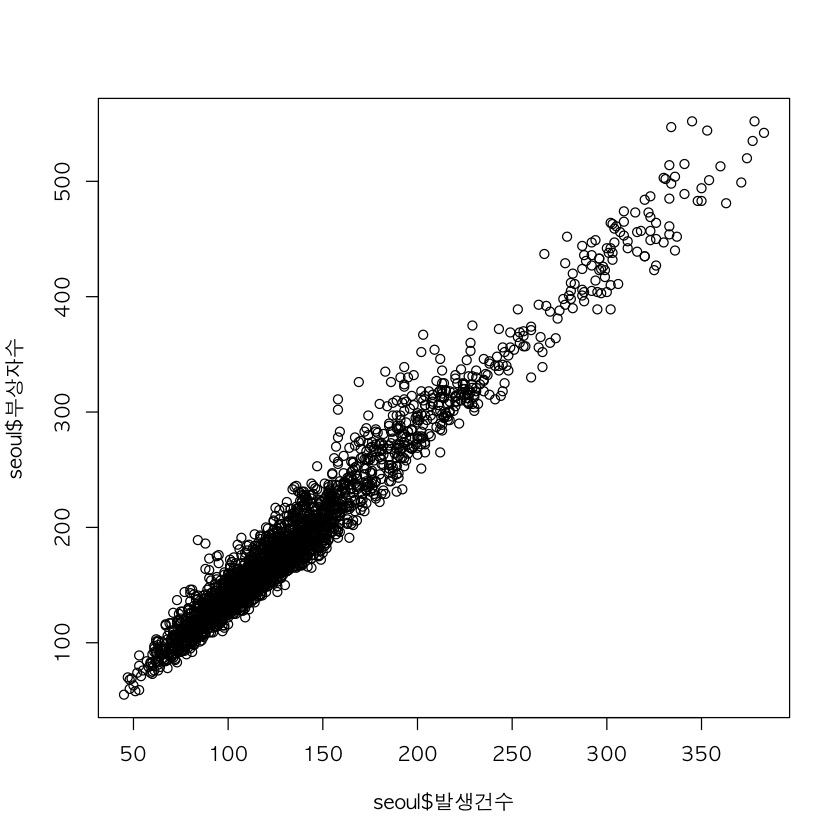

In [141]:
par(family = "AppleGothic")
plot(seoul$발생건수,seoul$부상자수)

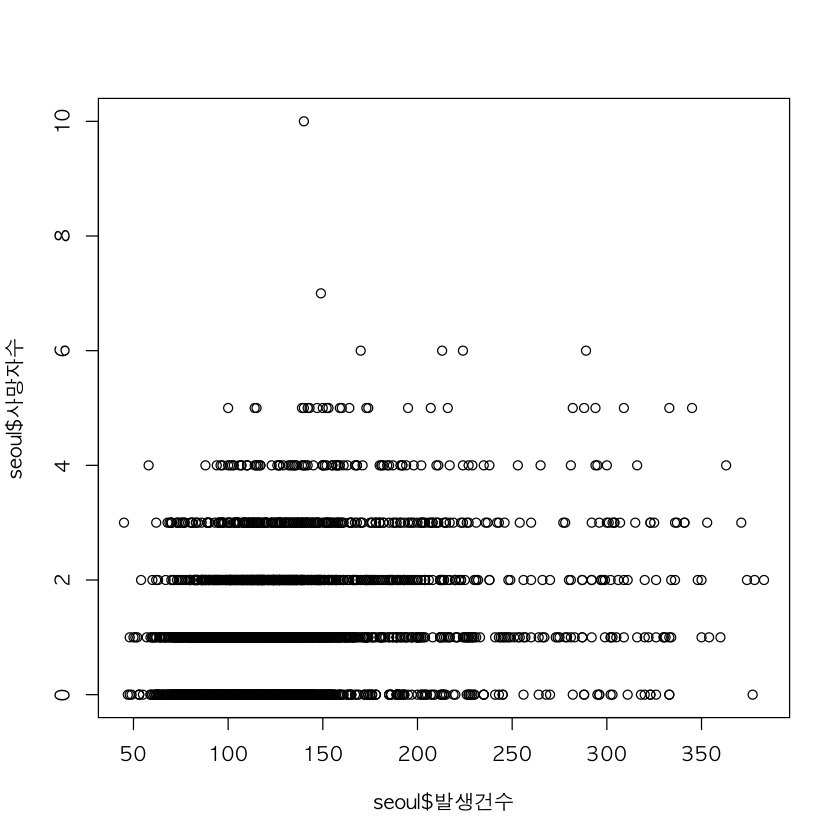

In [142]:
par(family = "AppleGothic")
plot(seoul$발생건수,seoul$사망자수)

In [143]:
seoul

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163
2011,7,종로구,103,1,154
2011,8,종로구,122,1,171
2011,9,종로구,121,2,166
2011,10,종로구,135,2,193
